# Euler (Euler-Cromer) Method
### First-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. It is the most basic explicit method for numerical integration of ordinary differential equations and is the simplest Runge–Kutta method.

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np

# Simple gravity pendulum
$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta$

# Euler method (energy non-preserving, instable)

We decompose the high order ODE into a system of equations

$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta = f''(x, dt)$

$\frac{d\theta}{dt} = \frac{d\theta}{dt} + \frac{d^2\theta}{dt^2}\Delta t = f'(x, dt)$

$\theta = \theta + \frac{d\theta}{dt}\Delta t = f(x, dt)$

<IPython.core.display.Javascript object>


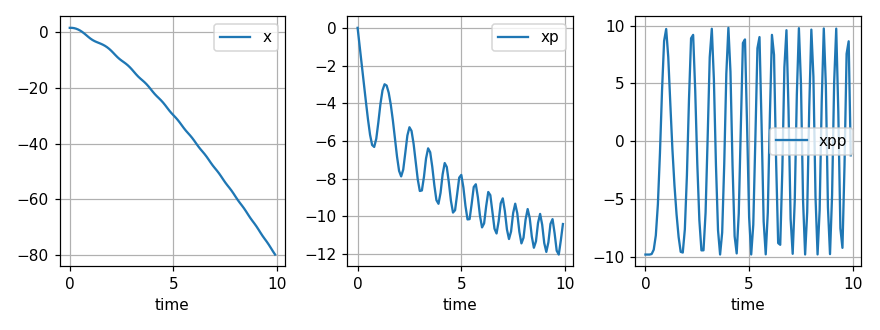

In [5]:
g = 9.8066
l = 1

def fpp(x_, dt):
    (x, xp, xpp) = x_
    return -g/l * math.sin(x)

def fp(x_, dt):
    (x, xp, xpp) = x_
    return xp + xpp*dt

def f(x_, dt):
    (x, xp, xpp) = x_
    return x + xp*dt

def euler_ode_solver(eqs, x0, t_interval, dt):
    """
        x: (x, dx/dt, d^2x/dt^2, ...) [0..Order]
        x0: (x, dx/dt, ...) [0..Order-1]
        eqs: reverse of x
    """    
    n_iterations = int((t_interval[1]-t_interval[0])/dt)
    
    t = [None]*n_iterations
    x = [[None]*len(eqs) for _ in range(n_iterations)]
    
    # set initial conditions
    t[0] = t_interval[0]
    for i in range(len(eqs)-1):
        x[0][i] = x0[i]
    # the highest derivative is calculated from the rest
    x[0][-1] = eqs[0](x[0], dt)

    # run algorithm
    for i in range(1, n_iterations):
        t[i] = t[i-1]+dt

        for j,eq in enumerate(eqs):
            x[i][len(eqs)-j-1] = eq(x[i-1], dt)

    # transpose list of lists
    return t, list(map(list, zip(*x)))

t, x = euler_ode_solver([fpp, fp, f], [np.pi/2, 0], [0, 10], 0.1)

plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.plot(t, x[0], label="x")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.plot(t, x[1], label="xp")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.subplot(1,3,3)
plt.plot(t, x[2], label="xpp")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.tight_layout()

# Euler-Cromer method

<IPython.core.display.Javascript object>


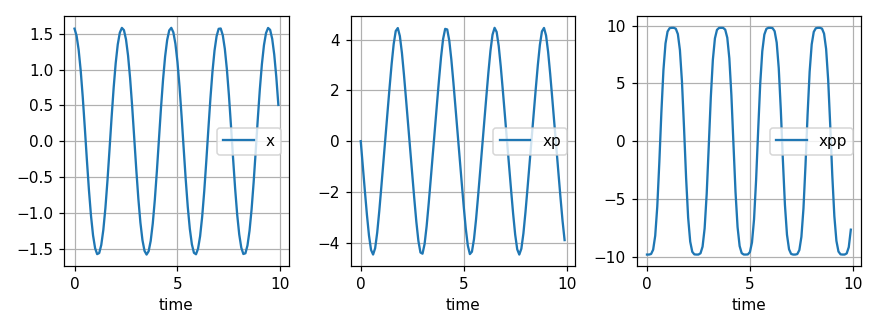

In [6]:
g = 9.8066
l = 1

def euler_cromer_ode_solver(eqs, x0, t_interval, dt):
    """
        x: (x, dx/dt, d^2x/dt^2, ...) [0..Order]
        x0: (x, dx/dt, ...) [0..Order-1]
        eqs: reverse of x
    """
    n_iterations = int((t_interval[1]-t_interval[0])/dt)
    
    t = [None]*n_iterations
    x = [[None]*len(eqs) for _ in range(n_iterations)]
    
    # set initial conditions
    t[0] = t_interval[0]
    for i in range(len(eqs)-1):
        x[0][i] = x0[i]
    # the highest derivative is calculated from the rest
    x[0][-1] = eqs[0](x[0], dt)

    # run algorithm
    for i in range(1, n_iterations):
        t[i] = t[i-1]+dt

        for j,eq in enumerate(eqs):
            # use always the latest values at each partial evaluation
            x_parz = [a if a is not None else b for a,b in zip(x[i],x[i-1])]

            x[i][len(eqs)-j-1] = eq(x_parz, dt)

    # transpose list of lists
    return t, list(map(list, zip(*x)))

t, x = euler_cromer_ode_solver([fpp, fp, f], [np.pi/2, 0], [0, 10], 0.1)

plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.plot(t, x[0], label="x")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.plot(t, x[1], label="xp")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.subplot(1,3,3)
plt.plot(t, x[2], label="xpp")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.tight_layout()

# Gravity pendulum with dampening
$\frac{d^2\theta}{dt^2} = -\frac{g}{l}sin\theta - k\frac{d\theta}{dt}$

<IPython.core.display.Javascript object>


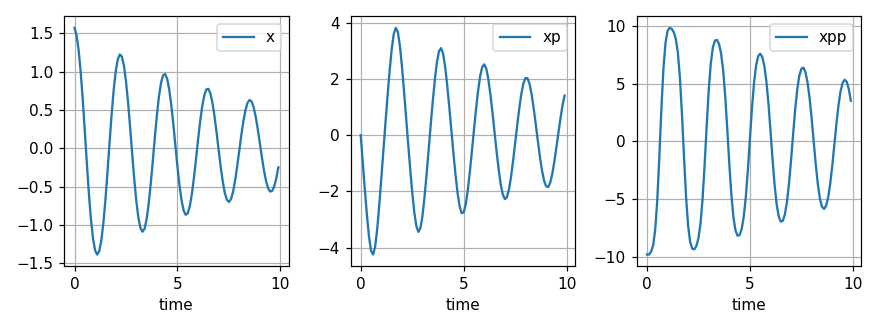

In [8]:
k = 0.2

def fpp(x_, dt):
    (x, xp, xpp) = x_
    return -g/l * math.sin(x) - k*xp

def fp(x_, dt):
    (x, xp, xpp) = x_
    return xp + xpp*dt

def f(x_, dt):
    (x, xp, xpp) = x_
    return x + xp*dt

t, x = euler_cromer_ode_solver([fpp, fp, f], [np.pi/2, 0], [0, 10], 0.1)

plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.plot(t, x[0], label="x")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.subplot(1,3,2)
plt.plot(t, x[1], label="xp")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.subplot(1,3,3)
plt.plot(t, x[2], label="xpp")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.tight_layout()